# <span style="font-family: Times New Roman">Table of Contents 📝</span><a class='anchor' id='top'></a>
- [Pandas: The Python Data Analysis Library](#1)
- [Introduction to Pandas Data Structures: Series](#2)
- [Introduction to Pandas Data Structures: DataFrame](#3)
- [Handling Missing Data](#4)
- [Removing Duplicates](#5)
- [Reading and Writing Data](#6)
- [Concatenating Dataframes and Series](#7)
- [Group By](#8)

##  <span style="font-family: Times New Roman" id="1">1) Pandas: The Python Data Analysis Library
> - Pandas arises from the need to have a specific library for analysis of the data which provides, in the 
simplest possible way, all the instruments for **the processing of data, data extraction, and data manipulation.**
> - This Python package is designed on the basis of the **NumPy library**. This was critical to the success and the rapid spread of pandas. In fact, this choice makes this library compatible with most of the other modules, and **takes advantage of the high quality of performance in calculating of the NumPy module**.
> - Instead of using existing data structures built into Python or provided by other libraries, two new data structures are the heart of Pandas (**Series** and **DataFrames**).

In [ ]:
# !pip install pandas

In [1]:
import pandas as pd # pd is an alias for the pandas word
import numpy as np

## <span style="font-family: Times New Roman">2) Introduction to Pandas Data Structures
> The heart of pandas is just the two primary data structures on which all transactions, which are generally 
made during the analysis of data, are centralized:<br>
> - **Series**: a **one-dimensional labeled array** holding data of any type such as integers, strings, etc.
>  - **DataFrame**: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

- ### <span style="font-family: Times New Roman" id="2">1) The Series
> The Series is the object of the pandas library designed to represent one-dimensional data structures, similarly to an array but with some additional features. Its internal structure is simple, it is composed of two arrays associated with each other. <span style="background:LemonChiffon">The main array has the purpose to hold the data (data of any NumPy type) to which each element is associated with a label, contained within the other array, called the Index. Index is a series of labels and it's responsible for holding the axis labels and other metadata (like the axis name or names).<br>
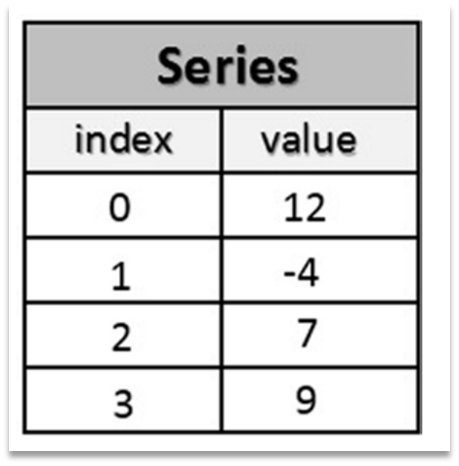

### 1.1) Creating a Series
> To create the Series simply call the **`Series()`** constructor passing as an argument an array containing the values to be included in it.

In [2]:
s = pd.Series([12, -4, 7, 9])
s

0    12
1    -4
2     7
3     9
dtype: int64

In [3]:
s = pd.Series([15, 20.5, 6, 8]) # Built on numpy, so all elements have the same data type.
s

0    15.0
1    20.5
2     6.0
3     8.0
dtype: float64

> If you do not specify any index during the definition of the Series, <span style="background:LemonChiffon"> by default, pandas will assign 
numerical values starting from 0 as labels.</span>To set labels by yourself, include the **`index`** option assigning an array containing the labels. It is preferable to create a Series using meaningful labels.


In [4]:
s = pd.Series([12, -4, 7, 9], index = ['a','b','c','d'])
s             

a    12
b    -4
c     7
d     9
dtype: int64

In [5]:
s2 = pd.Series([15,-50, 20, 9], index = [10, 20, 30, 40]) # index option takes list of any data type but must equal to length of data array.
s2             

10    15
20   -50
30    20
40     9
dtype: int64

> If you want to individually see the two arrays that make up this data structure you can call the two attributes of the Series as follows: **`index`** and **`values`**. 


In [6]:
s.values

array([12, -4,  7,  9], dtype=int64)

In [7]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

### 1.2) Defining Series from NumPy Arrays

> You can define new Series starting with **NumPy arrays**.

In [8]:
arr = np.array([1, 2, 3, 4])
s3 = pd.Series(arr) # you should always keep in mind that the values contained within the NumPy array or the original Series are not copied, but are passed by reference.
s3

0    1
1    2
2    3
3    4
dtype: int32

In [9]:
arr[0] = 100
arr

array([100,   2,   3,   4])

In [10]:
s3 # by changing the first element of the arr array we also modified the corresponding element in the s3 Series.

0    100
1      2
2      3
3      4
dtype: int32

In [11]:
s3[1] = 200
s3

0    100
1    200
2      3
3      4
dtype: int32

In [12]:
arr

array([100, 200,   3,   4])

### 1.3) Selecting the Internal Elements
> You can select them as an ordinary numpy array, specifying the position of index.

In [13]:
s = pd.Series([12, -4, 7, 9], index = ['a','b','c','d'])
s             

a    12
b    -4
c     7
d     9
dtype: int64

In [14]:
s['c']

7

In [15]:
s[2]

C:\Users\AFC\AppData\Local\Temp\ipykernel_3232\2635755408.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


7

> In the same way you select **multiple items** in a numpy array, you can specify the following:

In [17]:
s = pd.Series([12, -4, 7, 9], index = ['a','b','c','d'])
s            

a    12
b    -4
c     7
d     9
dtype: int64

In [16]:
s[0:2]

a    12
b    -4
dtype: int64

In [18]:
s['a': 'c']

a    12
b    -4
c     7
dtype: int64

> You can select the elements by specifying a **label** within an array.

In [19]:
s['c'] # the result is just the value associated with that label.

7

In [20]:
s[['a','c']]

a    12
c     7
dtype: int64

### 1.4) Assigning Values to the Elements

In [21]:
s = pd.Series([12, -4, 7, 9], index = ['a','b','c','d'])
s             

a    12
b    -4
c     7
d     9
dtype: int64

In [22]:
s[1] = 0  # Change value using the index.
s

C:\Users\AFC\AppData\Local\Temp\ipykernel_3232\1972306481.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  s[1] = 0  # Change value using the index.


a    12
b     0
c     7
d     9
dtype: int64

In [23]:
s['b'] = 1 # Change value using the label.
s

a    12
b     1
c     7
d     9
dtype: int64

### 1.5) Filtering Values
> Thanks to the choice of NumPy library as the base for the development of the pandas library and as a result <span style="background:LemonChiffon"> many operations applicable to NumPy arrays are extended to the Series.</span> One of these is the **filtering of the values** contained within the data structure through conditions.

In [24]:
s = pd.Series([12, -4, 7, 9, -5], index = ['a','b','c','d', 'e'])
s             

a    12
b    -4
c     7
d     9
e    -5
dtype: int64

In [25]:
s > 8 # Returns boolean array, True if it meet the condition and False otherwise.

a     True
b    False
c    False
d     True
e    False
dtype: bool

In [26]:
s[s > 8] = 10
# Returns the elements that satisfy the condition.

In [27]:
s

a    10
b    -4
c     7
d    10
e    -5
dtype: int64

In [28]:
s1['a'] = 100
s1

NameError: name 's1' is not defined

In [29]:
s

a    10
b    -4
c     7
d    10
e    -5
dtype: int64

In [30]:
s[s < 0]

b   -4
e   -5
dtype: int64

### 1.6) Operations and Mathematical Functions
> Other operations such as operators (+, -, *, /) or mathematical functions that are applicable to NumPy array 
can be extended to objects Series.

In [31]:
s = pd.Series([12, -4, 7, 9, -5], index=['a','b','c','d', 'e'])
s      

a    12
b    -4
c     7
d     9
e    -5
dtype: int64

In [32]:
s * 2

a    24
b    -8
c    14
d    18
e   -10
dtype: int64

> <span style="background:LemonChiffon"> Using NumPy mathematical functions, you must specify the function referenced with np</span> and the instance of the Series passed as argument.


In [33]:
np.log(s) # NaN is because of calculating log on negative values is undefined

c:\Users\AFC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


a    2.484907
b         NaN
c    1.945910
d    2.197225
e         NaN
dtype: float64

### 1.7) Operations between Series
> We have seen how to perform arithmetic operations between Series and scalar values. The same thing is possible by performing operations between two Series. In the following example you sum two Series <span style="background:LemonChiffon">having only some elements in common with label.</span>

In [34]:
colors_1 = ['red','yellow','orange','blue','green']
myseries = pd.Series([2000, 700, 500, 1000, 600], index=colors_1)
myseries

red       2000
yellow     700
orange     500
blue      1000
green      600
dtype: int64

In [35]:
colors_2 = ['red','black','yellow']
myseries_2 = pd.Series([1000, 300, 600], index=colors_2)
myseries_2

red       1000
black      300
yellow     600
dtype: int64

> <span style="background:LemonChiffon"> Only the items with the same label are added. All other label present in one of the two series are still added to the result but have a NaN value.

In [36]:
myseries + myseries_2 

black        NaN
blue         NaN
green        NaN
orange       NaN
red       3000.0
yellow    1300.0
dtype: float64

In [37]:
500 + np.nan # the arithmetic operations between NaN and the numbers give me NaN as we have seen 

nan

### 1.8) Checking Values
> Often within a Series there may be duplicate values and then you may need to have information on what are the samples contained, **counting duplicates** and **whether a value is present or not** in the Series.


In [38]:
s = pd.Series([10, 0, 20, 10, 20, 3], index=['white','white','blue','green','green','yellow'])
s

white     10
white      0
blue      20
green     10
green     20
yellow     3
dtype: int64

> **`value_counts()`** function, does not only returns the unique values, but calculates occurrences within a Series.

In [39]:
s.value_counts() # It returns count of each element/value in series. 

10    2
20    2
0     1
3     1
Name: count, dtype: int64

> **`isin()`** is a function that evaluates <span style="background:LemonChiffon"> the membership, it lets you know if these values are contained within the data structure.</span> Boolean values that are returned can be 
very useful during the filtering of data within a series or in a column of a DataFrame.

In [40]:
s.isin([3])

white     False
white     False
blue      False
green     False
green     False
yellow     True
dtype: bool

In [41]:
s.isin([0,3])

white     False
white      True
blue      False
green     False
green     False
yellow     True
dtype: bool

In [42]:
s[s.isin([0,3])]

white     0
yellow    3
dtype: int64

### 1.9) NaN Values
> - This specific value **NaN (Not a Number)** is used within pandas data structures to indicate the presence of an empty field or not definable numerically.
> - Generally, these NaN values are a problem and must be managed in some way, especially during data analysis.
> - These data are generated especially when extracting data from some source gave some trouble, or even when <span style="background:LemonChiffon">the source is a missing data or some calculations  as of logarithms of negative values, or exceptions during execution of some calculation or function.</span>

> - The **`isnull()`**  functions are very useful to identify the indexes without a value. The **`isnull()`** function returns **True** at NaN values in the Series;

In [43]:
s2 = pd.Series([5, -3, np.NaN, 14, np.NaN]) #  np.NaN used to define a missing value.
s2

0     5.0
1    -3.0
2     NaN
3    14.0
4     NaN
dtype: float64

In [44]:
s2.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [45]:
s2.isnull().sum()

2

In [46]:
s2[s2.isnull()]

2   NaN
4   NaN
dtype: float64

- ### <span style="font-family: Times New Roman" id="3">2) The DataFrame
> -  **The DataFrame** is a tabular data structure very similar to the Spreadsheet. This data structure is designed to extend the case of the Series to multiple dimensions. In fact, the DataFrame consists of an ordered collection of columns, each of which can contain a value of different type (numeric, string, Boolean, etc.)
> - <span style="background:LemonChiffon">The data frame has two index arrays. The first, associated with the lines, has very similar functions to the index array in Series. In fact, each label is associated with all the values in the row. The second array instead contains a series of labels, each associated with a particular column.
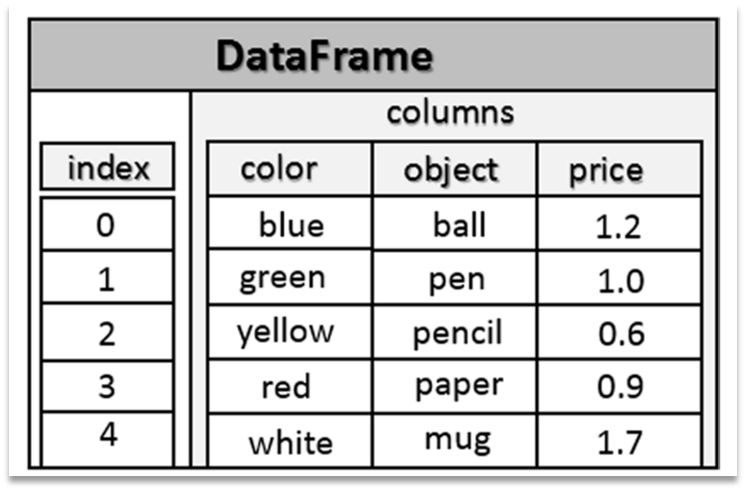

### 2.1) Creating a DataFrame
> The most common way to create a new DataFrame is precisely to pass a dict object to the **`DataFrame()`** constructor. <span style="background:LemonChiffon">This dict object contains a key for each column that we want to define, with an array of values for each of them.

In [47]:
data = {'color' : ['blue','green','yellow','red','white'],
        'object' : ['ball','pen','pencil','paper','mug'],
        'price' : [1.2,1.0,0.6,0.9,1.7]}

In [48]:
df = pd.DataFrame(data)
df

,color,object,price
0,blue,ball,1.2
1,green,pen,1.0
2,yellow,pencil,0.6
3,red,paper,0.9
4,white,mug,1.7


> If we want to create a dataframe using **some of the columns** from data. In the constructor of the data frame, you can specify a sequence of columns, using the **`columns`** option. The columns will be created in the order of the sequence regardless of how they are contained within the object dict.

In [49]:
df2 = pd.DataFrame(data, columns=['object','price'])
df2

,object,price
0,ball,1.2
1,pen,1.0
2,pencil,0.6
3,paper,0.9
4,mug,1.7


> Even for DataFrame objects, if the labels are not explicitly specified within the Index array, pandas automatically assigns a **numeric sequence starting from 0**. Instead, if you want to assign labels to the indexes of a DataFrame, you have to use the **`index`** option assigning it an array containing the labels.

In [50]:
df2 = pd.DataFrame(data, index=['One','Two','Three','Four','Five'])
df2

,color,object,price
One,blue,ball,1.2
Two,green,pen,1.0
Three,yellow,pencil,0.6
Four,red,paper,0.9
Five,white,mug,1.7


> Instead of using a dict object, you can define within the constructor **three arguments**, in the following order: a **data matrix**, then an array containing the labels assigned to the **index option**, and finally an array containing the names of the columns assigned to the **columns option**.

In [51]:
df3 = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['red','blue','yellow','white'],
                   columns=['ball','pen','pencil','paper']) 
df3

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


### 2.2) Selecting Elements

> If we want to know the name of all the columns of a DataFrame is sufficient to specify the **`columns`** attribute on the instance of the DataFrame object.

In [52]:
df3.columns

Index(['ball', 'pen', 'pencil', 'paper'], dtype='object')

> To get the list of indexes, you should specify the **`index`** attribute.

In [53]:
df3.index

Index(['red', 'blue', 'yellow', 'white'], dtype='object')

> To get the entire set of data use the **`values`** attribute.


In [54]:
df3.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

> To select only the contents of a column, you can write the name of the column.

In [ ]:
df3

In [55]:
df3['pencil'] # return value is a Series object.

red        2
blue       6
yellow    10
white     14
Name: pencil, dtype: int32

> Another way is to use the column name as an attribute of the instance of the DataFrame.


In [56]:
df3.pencil

red        2
blue       6
yellow    10
white     14
Name: pencil, dtype: int32

> if what you want to achieve is a single value within a DataFrame, first you have use the **name of the column** and then the **index or the label** of the row.

In [57]:
df3["pencil"][0] # Select a certain value from this column.

C:\Users\AFC\AppData\Local\Temp\ipykernel_3232\1286809228.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df3["pencil"][0] # Select a certain value from this column.


2

> If you need to extract a **portion of a DataFrame**, selecting the lines that you want to extract, you can **use the reference numbers of the indexes**.

In [58]:
df3["pencil"][0:3] # Select a sequence of values from a certain column.

red        2
blue       6
yellow    10
Name: pencil, dtype: int32

In [59]:
df3

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


> **Adding a new column**: You can do this by simply assigning a value to the instance of the DataFrame specifying a new column name.


In [ ]:
df3

In [60]:
df3["new"] = 12 # there is a new column called ‘new’ with the value within 12 duplicated for each of its elements.
df3

,ball,pen,pencil,paper,new
red,0,1,2,3,12
blue,4,5,6,7,12
yellow,8,9,10,11,12
white,12,13,14,15,12


In [61]:
df3["pencil"] = df3["new"]
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,12
blue,4,5,12,7,12
yellow,8,9,12,11,12
white,12,13,12,15,12


In [62]:
df3["new"]  = [3.0, 1.3, 2.2, 0.8] # To do an update of the contents of a column, you have to use an array.
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,11,2.2
white,12,13,12,15,0.8


> To change a single value, simply select the item and give it the new value.

In [63]:
df3["paper"][2] = 1
df3

C:\Users\AFC\AppData\Local\Temp\ipykernel_3232\3865141655.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df3["paper"][2] = 1
C:\Users\AFC\AppData\Local\Temp\ipykernel_3232\3865141655.py:1: SettingWithCopyWarning: 
A value is trying to b

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,1,2.2
white,12,13,12,15,0.8


In [64]:
df3.loc["yellow", "paper"] = 60

### `loc()` and `iloc()`

In [65]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [66]:
df3.loc[["red", "blue"], ["ball", "pen"]] # indexing by labels (label based)

,ball,pen
red,0,1
blue,4,5


In [67]:
df3.loc[["red", "blue"], :]

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3


In [68]:
df3.loc[:, ["ball", "pencil"]]

,ball,pencil
red,0,12
blue,4,12
yellow,8,12
white,12,12


In [69]:
df3.loc['red', 'ball']

0

In [70]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [71]:
df3.loc['red']

ball       0.0
pen        1.0
pencil    12.0
paper      3.0
new        3.0
Name: red, dtype: float64

In [72]:
df3.loc[:, ['ball']]

,ball
red,0
blue,4
yellow,8
white,12


In [73]:
df3.loc[df3["pencil"] > 6]

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [74]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [75]:
df3.iloc[0] # single row

ball       0.0
pen        1.0
pencil    12.0
paper      3.0
new        3.0
Name: red, dtype: float64

In [76]:
df3.iloc[0,1] # integer position based, row = 0 column = 0

1

In [77]:
df3.iloc[0:2, 0:2]

,ball,pen
red,0,1
blue,4,5


In [78]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [79]:
df3.iloc[0:2, :]

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3


In [80]:
df3.iloc[:, 0:2]

,ball,pen
red,0,1
blue,4,5
yellow,8,9
white,12,13


In [81]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [82]:
df3.iloc[[0, 3], :]

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
white,12,13,12,15,0.8


### 2.3) Membership of a Value
> You have already seen the function **`isin()`** applied to the Series to decide the membership of a set of values. 
Well, this feature is also applicable on DataFrame objects.

In [83]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [84]:
df3.isin([6, 14]) # return boolean datframe

,ball,pen,pencil,paper,new
red,False,False,False,False,False
blue,False,False,False,False,False
yellow,False,False,False,False,False
white,False,False,False,False,False


In [85]:
df3['pencil'].isin([6, 14])

red       False
blue      False
yellow    False
white     False
Name: pencil, dtype: bool

In [86]:
df3[df3['pencil'].isin([6, 14])]

,ball,pen,pencil,paper,new


In [87]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [88]:
(df3['pencil'] >= 6) | (df3['ball'] > 4)

red       True
blue      True
yellow    True
white     True
dtype: bool

In [89]:
df3[df3.isin([6, 14])]

,ball,pen,pencil,paper,new
red,NaN,NaN,NaN,NaN,NaN
blue,NaN,NaN,NaN,NaN,NaN
yellow,NaN,NaN,NaN,NaN,NaN
white,NaN,NaN,NaN,NaN,NaN


### 2.4) Deleting a Column
> If you want to delete an entire column with all its contents, then use the **`del`** command.

In [91]:
df3

,ball,pen,pencil,paper,new
red,0,1,12,3,3.0
blue,4,5,12,7,1.3
yellow,8,9,12,60,2.2
white,12,13,12,15,0.8


In [92]:
del df3['new'] # If the column name does not exist it returns error.

In [93]:
df3

,ball,pen,pencil,paper
red,0,1,12,3
blue,4,5,12,7
yellow,8,9,12,60
white,12,13,12,15


### 2.5) Filtering
> Even for a DataFrame you can apply the filtering through the application of certain conditions.

In [94]:
df3

,ball,pen,pencil,paper
red,0,1,12,3
blue,4,5,12,7
yellow,8,9,12,60
white,12,13,12,15


In [95]:
df3 < 12

,ball,pen,pencil,paper
red,True,True,False,True
blue,True,True,False,True
yellow,True,True,False,False
white,False,False,False,False


In [96]:
df3[df3 < 12] # You will get as returned object a DataFrame containing values less than 12, keeping their original position. All others will be replaced with NaN.

,ball,pen,pencil,paper
red,0.0,1.0,NaN,3.0
blue,4.0,5.0,NaN,7.0
yellow,8.0,9.0,NaN,NaN
white,NaN,NaN,NaN,NaN


In [ ]:
# Pandas is designed to preserve the shape of the DataFrame during boolean indexing.
# Instead of dropping rows or columns that don’t meet the condition, it replaces the values with NaN to maintain the original structure.

### 2.6) Dropping
> - Deleting a row or a column becomes simple, precisely due to the labels used to indicate the indexes and column names.
> - Also in this case, pandas provides a specific function for this operation: **`drop()`**. This method will return 
a new object without the items that you want to delete. 
> - **`drop()`** works on both Series and DataFrames.

In [97]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
           index  =['red','blue','yellow','white'],
               columns=['ball','pen','pencil','paper'])
df

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [99]:
df.drop(columns = ['ball'], inplace=True) # inplace = True, to change in the data frame

In [100]:
df

,pen,pencil,paper
red,1,2,3
blue,5,6,7
yellow,9,10,11
white,13,14,15


> To delete columns, you always need to specify the indexes of the columns, but you must specify the axis from which to delete the elements, and this can be done using the **`axis`** option. So **to refer to the column names you should specify axis = 1**. 

In [101]:
df.drop(['pen','pencil'],axis=1, inplace=True)

In [102]:
df

,paper
red,3
blue,7
yellow,11
white,15


In [103]:
df.drop(columns=['pen','pencil'])

KeyError: "['pen', 'pencil'] not found in axis"

In [104]:
df

,paper
red,3
blue,7
yellow,11
white,15


### 2.7) Arithmetic and Data Alignment
> Pandas is able to perform the alignment of the indexes coming from two different data structures. This is especially true when you are performing an arithmetic operation between them. In fact, during these operations, not only may the indexes between the two structures be in a different order, but they also may be present in only one of the two structures. When the labels are present in both operators, their values will be added, while in the opposite case, they will also be shown in the result, but with the value NaN. (These operations are applied on both **Series and DataFrames**)


In [105]:
df1 = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index=['red','blue','yellow','white'],
                   columns=['ball','pen','pencil','paper'])
df1

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [106]:
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                   index=['blue','green','white','yellow'],
                   columns=['mug','pen','ball'])
df2

,mug,pen,ball
blue,0,1,2
green,3,4,5
white,6,7,8
yellow,9,10,11


In [107]:
df1 + df2   # The common columns between the 2 dataframes are ('ball', 'pen'), that's why they have numbers, while others are NaN (Nan + number = Nan) 

,ball,mug,paper,pen,pencil
blue,6.0,NaN,NaN,6.0,NaN
green,NaN,NaN,NaN,NaN,NaN
red,NaN,NaN,NaN,NaN,NaN
white,20.0,NaN,NaN,20.0,NaN
yellow,19.0,NaN,NaN,19.0,NaN


### 2.8) Function Application

### 2.8.1) Functions by Element
> Universal functions, called **ufunc**. This class of functions is particular because it **operates by element** in the data structure.

In [108]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=['red','blue','yellow','white'],
                    columns=['ball','pen','pencil','paper'])
df

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [109]:
np.sqrt(df)    # calculate the square root of each value within the data frame

,ball,pen,pencil,paper
red,0.000000,1.000000,1.414214,1.732051
blue,2.000000,2.236068,2.449490,2.645751
yellow,2.828427,3.000000,3.162278,3.316625
white,3.464102,3.605551,3.741657,3.872983


### 2.8.2) Functions by Row or Column
> The application of the functions is not limited to the ufunc functions, but also includes those <span style="background:LemonChiffon">defined by the user.</span> The important thing is that they operate on a **certain axis**.

> 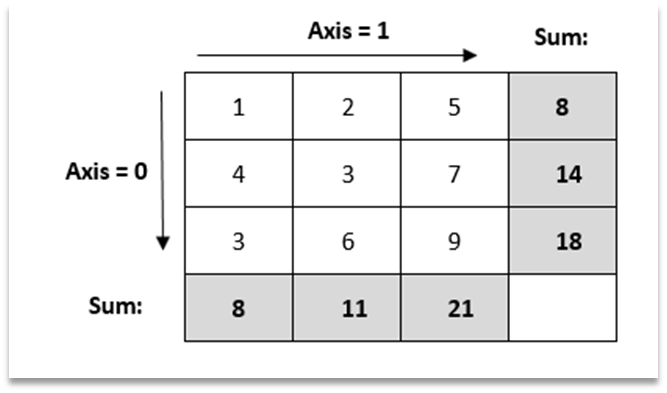

In [ ]:
# user defined function
def foo(x):
    return x*2

In [110]:
df

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [111]:
df.apply(lambda x: x + 200)

,ball,pen,pencil,paper
red,200,201,202,203
blue,204,205,206,207
yellow,208,209,210,211
white,212,213,214,215


In [112]:
df

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [113]:
df.apply(np.min) # default axis = 0, which works on columns, while axis = 1 works on rows 

ball      0
pen       1
pencil    2
paper     3
dtype: int32

In [114]:
df.apply(np.min, axis = 1)

red        0
blue       4
yellow     8
white     12
dtype: int32

In [ ]:
df.apply(np.sum, axis = 1)

### 2.8.3) Statistics Functions


> There is also a function called **`describe()`** that allows to obtain a summary statistics at once.

In [115]:
df.describe()

,ball,pen,pencil,paper
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


This means that:
- **std** is how much the values differ from the mean value. The higher the standard deviation, the more spread the values are, with more significant gaps between them.

- **25%** of the values are below 3
- **50%** (median) of the values are below 6
- **75%** of the values are below 9

### 2.9) Sorting
> Sorting the data is often a necessity and it is very important to be able to do easily. Pandas provides the **`sort_index()`** function that **returns a new object** which is identical to the start, but in which the elements are ordered. (Works on both **Series and DataFrames**).


In [116]:
df = pd.DataFrame(np.random.randint(7, size = 16).reshape((4,4)), # be carful it's random numbers
                   index=['red','blue','yellow','white'],
                   columns=['ball','pen','pencil','paper'])
df

,ball,pen,pencil,paper
red,5,5,5,6
blue,1,1,5,0
yellow,0,4,2,3
white,1,6,5,3


In [117]:
df.sort_index()  # ascending = False, to reverse the order .. ordering the index alphabetically

,ball,pen,pencil,paper
blue,1,1,5,0
red,5,5,5,6
white,1,6,5,3
yellow,0,4,2,3


> If you need to order the **values** in a DataFrame, you will use the **`sort_values()`** function with the **`by`** option. Then you have to specify the name of the column on which to sort.

In [118]:
df

,ball,pen,pencil,paper
red,5,5,5,6
blue,1,1,5,0
yellow,0,4,2,3
white,1,6,5,3


In [119]:
df.sort_values(by='pen') # to descending order put ascending = False 

,ball,pen,pencil,paper
blue,1,1,5,0
yellow,0,4,2,3
red,5,5,5,6
white,1,6,5,3


<span style="background:LightGreen">**Note:**</span> When you sort a DataFrame by a single column and there are duplicate values in that column, pandas will use the **index** to determine the order of these rows.

> If the criteria of sorting will be based on two or more columns, you can assign an array containing the names of the columns to the **`by`** option.
> 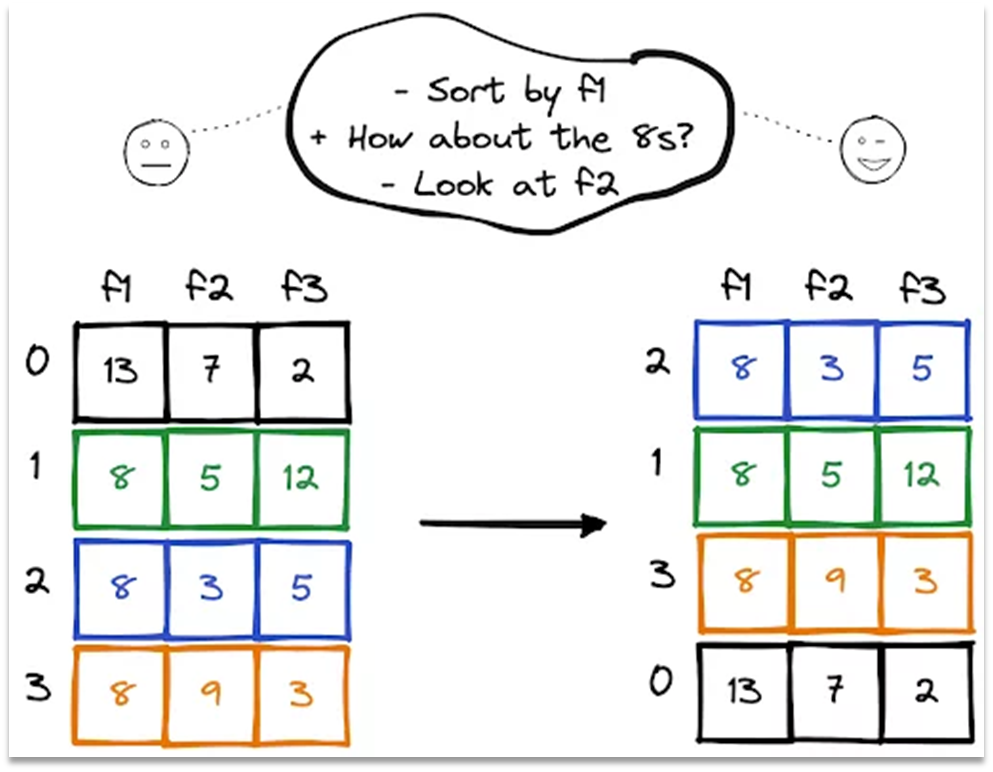

In [120]:
df.sort_values(by=['pen','pencil']) # when the pen elements are the same, we look to the second column. By default, both column will order ascending to sort on

,ball,pen,pencil,paper
blue,1,1,5,0
yellow,0,4,2,3
red,5,5,5,6
white,1,6,5,3


## <span style="font-family: Times New Roman" id="4">3) Handling Missing Data
> **Notice that:** within the pandas library, the calculation of descriptive statistics excludes NaN values implicitly.


### 3.1) Filtering Out NaN Values
> There are various options to eliminate the NaN values during the data analysis. However, the elimination by hand, element by element, can be very tedious and risky, because you never get the certainty of having eliminated all the NaN values. The **`dropna()`** function comes to your aid.

In [121]:
s = pd.Series([0, 1, 2, np.NaN, 9], index=['red','blue','yellow','white','green'])
s

red       0.0
blue      1.0
yellow    2.0
white     NaN
green     9.0
dtype: float64

In [122]:
s.dropna(inplace=True) # inplace = True 

In [123]:
s # The original array does not change so, you should assign the result to a variable or inplace = True

red       0.0
blue      1.0
yellow    2.0
green     9.0
dtype: float64

> If you’re dealing with the DataFrame it gets a little more complex. If you use the **`dropna()`** function on this type of object, it is sufficient that there is only one value NaN on a column or a row to eliminate it completely.

In [124]:
df =  pd.DataFrame([[6 ,np.nan, 6], [np.nan, np.nan, np.nan], [2, np.nan, 5]],
                   index = ['blue','green','red'],
                   columns = ['ball','mug','pen'])
df

,ball,mug,pen
blue,6.0,NaN,6.0
green,NaN,NaN,NaN
red,2.0,NaN,5.0


In [125]:
df.dropna() # default --> axis = 0

,ball,mug,pen


> Therefore to avoid having entire rows and columns disappear completely, you should specify the **`how`** option, assigning a value of ‘all’ to it, in order to inform the **`dropna()` function to delete only the rows or columns in which all elements are NaN.**


In [126]:
df.dropna(how='all') # default any: remove column when we have at least one NA, axis = 0 -> rows 

,ball,mug,pen
blue,6.0,NaN,6.0
red,2.0,NaN,5.0


In [127]:
df.dropna(how='all', axis = 1)  # Removed column that is completly NaN

,ball,pen
blue,6.0,6.0
green,NaN,NaN
red,2.0,5.0


### 3.2) Filling in NaN Occurrences
> Rather than filter NaN values within data structures, with the risk of discarding them along with values that could be relevant in the <span style="background:LemonChiffon">context of data analysis</span>, you could replace them with other numbers. For most purposes, the **`fillna()`** function could be a great choice. This method **takes one argument, the value with which to replace any NaN**. It can be the same for all, as in the following case.

In [128]:
df

,ball,mug,pen
blue,6.0,NaN,6.0
green,NaN,NaN,NaN
red,2.0,NaN,5.0


In [129]:
df.fillna(0)

,ball,mug,pen
blue,6.0,0.0,6.0
green,0.0,0.0,0.0
red,2.0,0.0,5.0


> You can replace NaN with different values depending on the column.

In [130]:
m = df['ball'].median()

In [131]:
df.fillna({'ball':1,'mug':0,'pen':99}) # Each column's NaN is filled with a diferent value

,ball,mug,pen
blue,6.0,0.0,6.0
green,1.0,0.0,99.0
red,2.0,0.0,5.0


### 3.3) Replacing NaN Occurrences
>  A common case, for using **`replace()`** function, is the replacement of the NaN values with another value, for example 0. \

In [132]:
s = pd.Series([1, 3, np.nan, 4, 6, np.nan, 3])
s

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

In [133]:
s = s.replace(np.nan, 0) #  inplace = True, 
                      #  If I want to replace multiple values use dictionary pd.replace({old_value_1: new_value_1, old_value_2: new_value_2, ....})`

In [134]:
s

0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

## <span style="font-family: Times New Roman" id="5">4) Removing Duplicates
>  Duplicate rows might be present in a DataFrame for various reasons. In DataFrames of enormous size the detection of these rows can be very problematic. Pandas provides us with a series of tools to analyze the duplicate data present in large data structures.

In [135]:
df = pd.DataFrame({ 'color': ['white','white','red','red','white', 'yellow'],
                    'price': [2, 1, 3, 3, 2, 6]})
df

,color,price
0,white,2
1,white,1
2,red,3
3,red,3
4,white,2
5,yellow,6


>  The **`duplicated()`** function applied to a DataFrame can detect the rows which appear to be  duplicated. It returns a **Series of Booleans** where each element corresponds to a row, with **True if the row is duplicated** (i.e., only the other occurrences, not the first), and with **False if there are no duplicates** in the previous elements.

In [136]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

> The fact of having as the return value a Boolean Series can be useful in many cases, especially for the 
**filtering**. It helps to know what are the duplicate rows.

In [137]:
df[df.duplicated()]

,color,price
3,red,3
4,white,2


In [138]:
df[~df.duplicated()]

,color,price
0,white,2
1,white,1
2,red,3
5,yellow,6


> Generally, all duplicated rows are to be deleted from the DataFrame; to do that, pandas provides the **`drop_duplicates()`** function, which returns the DataFrame without duplicate rows.


In [139]:
df.drop_duplicates(inplace=True) # inplace = True

In [140]:
df.reset_index()

,index,color,price
0,0,white,2
1,1,white,1
2,2,red,3
3,5,yellow,6


## <span style="font-family: Times New Roman" id="6">5) Reading and Writing Data
> Pandas is a library specialized for data analysis, so you expect that it is mainly focused on calculation 
and data processing. Moreover, even the process of writing and reading data from/to external files can be 
considered a part of the data processing.
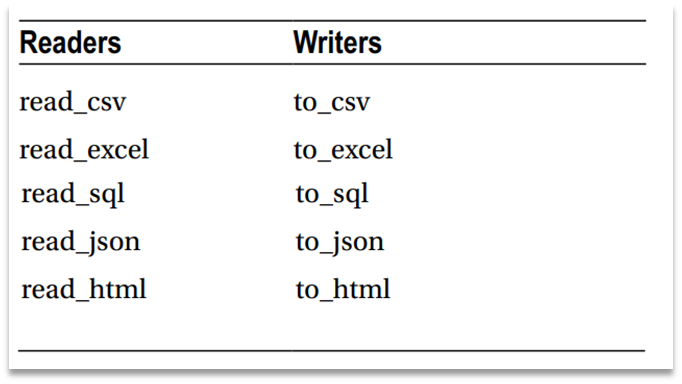

### 5.1) CSV Files
>  Data are generally reported in tabular form.  <span style="background:LemonChiffon">If the values in a row are separated by a comma, you have the **CSV 
(comma-separated values)** format </span>, which is perhaps the best-known and most popular format.
>  <span style="background:LemonChiffon">This type of file is the most common source of data and actually even easier to transcribe and interpret.</span> In this regard pandas provides a set of functions specific for this type of file.
> - **read_csv**
> - **to_csv**

### 5.1.1) Reading CSV Files

In [5]:
df = pd.read_csv("my_CSV_1.csv")
df

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


> In the example you just saw, you can notice that in the CSV file, headers to identify all the columns are in the first row. But this is not a general case, it often happens that the tabulated data begin directly from the first line. In this case determine  **`header`** option to be equal to None. 

In [7]:
df = pd.read_csv("my_CSV_2.csv") # First row is considered as a header
df

,1,5,2,3,cat
0,2,7,8,5,dog
1,3,3,6,7,horse
2,2,2,8,3,duck
3,4,4,2,1,mouse


In [9]:
df = pd.read_csv("my_CSV_2.csv", header = None)
df

,0,1,2,3,4
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


> In addition, there is also the possibility to specify the names directly assigning a list of labels to the 
**`names`** option.

In [11]:
df = pd.read_csv("my_CSV_2.csv", names=['white','red','blue','green','animal'])
df

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


In [13]:
df = pd.read_csv("my_CSV_1.csv",  usecols = ['blue','green','animal']) # If I want to read certain columns from the file
df

,blue,green,animal
0,2,3,cat
1,8,5,dog
2,6,7,horse
3,8,3,duck
4,2,1,mouse


> Important functions related with the dataframes **`dataframe_name.head()`**, **`dataframe_name.tail()`**, **`dataframe_name.info()`**.

In [15]:
df = pd.read_csv("iris.csv")
df

,Id,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
148,149,6.2,3.4,NaN,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,1,5.1,3.5,1.4,0.2,Iris-setosa
151,2,4.9,3.0,1.4,0.2,Iris-setosa


In [21]:
df.head(20) # default = 5, displays rows from the begining of the dataframe 

,Id,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
df.tail()  # default = 5, displays rows from the end of the dataframe 

,Id,sepallength,sepalwidth,petallength,petalwidth,class
148,149,6.2,3.4,NaN,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,1,5.1,3.5,1.4,0.2,Iris-setosa
151,2,4.9,3.0,1.4,0.2,Iris-setosa
152,3,4.7,3.2,1.3,0.2,Iris-setosa


In [23]:
df.info()  # Gives information about name of columns, there is null or not, and the data type of each of them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           153 non-null    int64  
 1   sepallength  152 non-null    float64
 2   sepalwidth   153 non-null    float64
 3   petallength  151 non-null    float64
 4   petalwidth   153 non-null    float64
 5   class        153 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ KB


### 5.1.2) Writing CSV Files
> In addition to reading the data contained within a file, the writing of a data file produced by a calculation, or in general the data contained in a data structure, is a common and necessary operation.
> For example, you might want to write to a CSV file the data contained in a DataFrame. To do this writing process you will use the **`to_csv()`** function that accepts as an **argument the name of the file** you generate. 

In [25]:
df =  pd.DataFrame(np.arange(16).reshape((4,4)),
                   index=['red','blue','yellow','white'],
                   columns=['ball','pen','pencil','paper'])
df

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [27]:
df.to_csv("My_Saved_DF.csv")

> As you can see from the previous example, when you make the writing of a data frame to a file, by default both indexes and columns are marked on the file. This default behavior can be changed by placing the two options **`index` and `header`** set to **False**. 

In [29]:
df.to_csv('My_Saved_DF_2.csv', index=False, header=False)

> One thing to take into account when making the writing of files is that **NaN values** present in a data structure are shown as **empty fields in the file**. 

In [31]:
df =  pd.DataFrame([[6,np.nan,6],[np.nan,np.nan,np.nan],[2,np.nan,5]],
                   index = ['blue','green','red'],
                   columns = ['ball','mug','pen'])
df

,ball,mug,pen
blue,6.0,NaN,6.0
green,NaN,NaN,NaN
red,2.0,NaN,5.0


In [33]:
df.to_csv("My_Saved_DF_With_NaN.csv")

> You can replace this empty field with a value to your liking using the **`na_rep`** option in the **`to_csv()`** function. Common values may be NULL, 0, or the same NaN.

In [35]:
df.to_csv("My_Saved_DF_With_NaN_2.csv", na_rep = 0)

## <span style="font-family: Times New Roman" id="7">6) Concatenating Dataframes and Series
> In pandas library and its data structures like Series and DataFrame, the fact of having labeled axes allows you to further generalize the concatenation of arrays. The **`concat()`** function is provided by pandas for this kind of operation.

> **Notice that:**  In NumPy,the function that do this kind of operation with arrays provides a **`concatenate()`**. 

- ### Concatenation on Series

In [141]:
ser1 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd']) 
ser1

a    0
b    1
c    2
d    3
dtype: int32

In [142]:
ser2 = pd.Series(np.arange(5, 9), index=['a', 'b', 'c', 'd'])
ser2

a    5
b    6
c    7
d    8
dtype: int32

In [43]:
pd.concat([ser1, ser2], ignore_index=True) # Grow vertically and no NaN values
                       # ignore_index = True: to make the indexes automatically generated starting from 0 and not take original indexes.

0    0
1    1
2    2
3    3
4    5
5    6
6    7
7    8
dtype: int32

> By default, the **`concat()`** function works on **axis = 0** , having as returned object a Series. If you set the  axis = 1, then the result will be a DataFrame.


In [45]:
pd.concat([ser1, ser2], axis=1)    # Grow horizontally, no NaN values (because they have the same labels).

,0,1
a,0,5
b,1,6
c,2,7
d,3,8


In [143]:
ser1

a    0
b    1
c    2
d    3
dtype: int32

In [144]:
ser3 = pd.Series(np.arange(20, 24), index=[5, 6, 7, 8])
ser3

5    20
6    21
7    22
8    23
dtype: int32

In [51]:
pd.concat([ser1, ser3], axis=1)   # Grow horizontally, there are NaN values (because they have different labels).

,0,1
a,0.0,NaN
b,1.0,NaN
c,2.0,NaN
d,3.0,NaN
5,NaN,20.0
6,NaN,21.0
7,NaN,22.0
8,NaN,23.0


- ### Concatenation on DataFrames
> The same logic can be applied to the DataFrame.

- **Case 1:** have the same columns and concat on axis = 0, **grow vertically and no NaN values**.


In [145]:
df1 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df1

,A,B,C
1,0.818746,0.409500,0.964187
2,0.214860,0.614109,0.952289
3,0.205684,0.514850,0.185820


In [147]:
df2 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df2

,A,B,C
1,0.062777,0.400343,0.503137
2,0.527225,0.025647,0.099452
3,0.625713,0.840599,0.561322


In [148]:
pd.concat([df1, df2])   # Concatenate them vertically, notice that it even takes the index axis = 0

,A,B,C
1,0.818746,0.409500,0.964187
2,0.214860,0.614109,0.952289
3,0.205684,0.514850,0.185820
1,0.062777,0.400343,0.503137
2,0.527225,0.025647,0.099452
3,0.625713,0.840599,0.561322


In [149]:
pd.concat([df1, df2], ignore_index=True) # ignore_index = True: to make the indexes automatically generated starting from 0 and not take original indexes.

,A,B,C
0,0.818746,0.409500,0.964187
1,0.214860,0.614109,0.952289
2,0.205684,0.514850,0.185820
3,0.062777,0.400343,0.503137
4,0.527225,0.025647,0.099452
5,0.625713,0.840599,0.561322


- **Case 2:** have different columns and concat on axis = 0, **grow vertically** and **there are NaN values** on the different columns.

In [61]:
df1 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df1

,A,B,C
1,0.105765,0.180177,0.250400
2,0.140494,0.411406,0.869002
3,0.565646,0.700482,0.156027


In [63]:
df2 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['X','B','C'])
df2

,X,B,C
1,0.117654,0.153976,0.724254
2,0.227649,0.301042,0.642455
3,0.824497,0.818246,0.070627


In [65]:
pd.concat([df1, df2]) # axis = 0 vertically 

,A,B,C,X
1,0.105765,0.180177,0.250400,NaN
2,0.140494,0.411406,0.869002,NaN
3,0.565646,0.700482,0.156027,NaN
1,NaN,0.153976,0.724254,0.117654
2,NaN,0.301042,0.642455,0.227649
3,NaN,0.818246,0.070627,0.824497


- **Case 3:** have the same labels (rows' index) and concat on axis = 1, **grow horizontally** and **no NaN values**.

In [150]:
df1 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df1

,A,B,C
1,0.915572,0.398002,0.040641
2,0.563910,0.733890,0.807790
3,0.423386,0.912806,0.350844


In [151]:
df2 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df2

,A,B,C
1,0.553825,0.681453,0.418963
2,0.157387,0.061307,0.515945
3,0.638506,0.358703,0.102328


In [153]:
pd.concat([df1, df2], axis=1,ignore_index=False)    # Concatenate on labels  (horizontally), 2 dataframes have the same labels(1, 2, 3) . 
                                 # ignore_index = True: set the index of columns automatically from 

,A,B,C,A,B,C
1,0.915572,0.398002,0.040641,0.553825,0.681453,0.418963
2,0.563910,0.733890,0.807790,0.157387,0.061307,0.515945
3,0.423386,0.912806,0.350844,0.638506,0.358703,0.102328


- **Case 4:** have different labels (rows' index) and concat on axis = 1, **grow horizontally** and **there are NaN values** in rows with different labels.

In [79]:
df1 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[1,2,3], 
                   columns=['A','B','C'])
df1

,A,B,C
1,0.297721,0.521836,0.074164
2,0.416467,0.175280,0.903664
3,0.178395,0.199119,0.270320


In [81]:
df2 = pd.DataFrame(np.random.rand(9).reshape(3,3), 
                   index=[4,5,6], 
                   columns=['A','B','C'])
df2

,A,B,C
4,0.634925,0.709777,0.754531
5,0.957289,0.450128,0.518718
6,0.585448,0.047782,0.903444


In [85]:
pd.concat([df1, df2], axis=0) # Concatenate on labels  (horizontally), 2 dataframes have different labels.


,A,B,C
1,0.297721,0.521836,0.074164
2,0.416467,0.175280,0.903664
3,0.178395,0.199119,0.270320
4,0.634925,0.709777,0.754531
5,0.957289,0.450128,0.518718
6,0.585448,0.047782,0.903444


## <span style="font-family: Times New Roman" id="8">7) Group By 

> - For data aggregation you generally mean a transformation that produces a <span style="background:LemonChiffon">single integer</span> from an array. In fact, you have already made many operations of data aggregation, for example, when we calculated the sum(), mean(), count().
> - A more formal manner and the one with more control in data aggregation is that which includes the <span style="background:LemonChiffon">categorization of a set.</span>
> - **Grouping** is often a critical stage in the process of data analysis. It is a process of transformation since after the division into different groups, you apply a function that converts or transforms the data in some way depending on the group they belong to.

>    - **Group By** refers to its internal mechanism as a process called <span style="background:SkyBlue">**SPLIT-APPLY-COMBINE**</span>. This process as divided into three different phases:
>         - **splitting:** division into groups of datasets
>         -	**applying:** application of a function on each group
>         -	**combining:** combination of all the results obtained by different groups

>   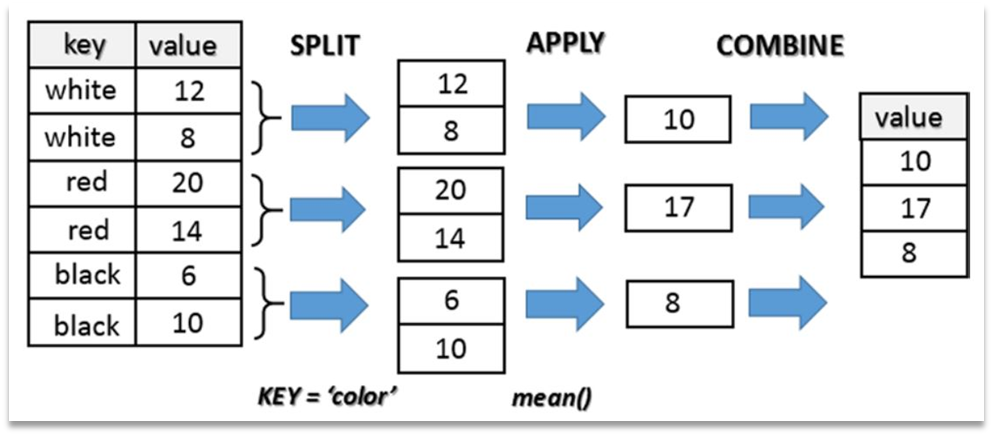

In [154]:
df = pd.DataFrame({ 'color': ['white','red','green','red','green'],
                        'object': ['pen','pencil','pencil','ashtray','pen'],
                        'price1' : [5.56,4.20,1.30,0.56,2.75],
                        'price2' : [4.75,4.12,1.60,0.75,3.15]})

In [155]:
df

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


> Suppose you want to calculate the average *price1 column* using group labels listed in the column color. You can for example access the price1 column and call the **`groupby()`** function with the column color.

In [156]:
group = df['price1'].groupby(df['color']).mean()

In [157]:
group

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [158]:
group = df['price1'].groupby(df['color'])

In [159]:
group

In [160]:
group.groups # groupby() function generates an GroupBy object that is the core of the whole process. this process is not an explicitl process

{'green': [2, 4], 'red': [1, 3], 'white': [0]}

In [161]:
group.groups # it returns the index of where the categories' group is

{'green': [2, 4], 'red': [1, 3], 'white': [0]}

In [162]:
group.mean() # apply an aggregate function on the group to get only one result

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [163]:
group.sum()

color
green    4.05
red      4.76
white    5.56
Name: price1, dtype: float64

> You can use group by on multiple columns or the entire data frame

In [164]:
df[['price1','price2']].groupby(df['color']).mean()

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [105]:
df.groupby(df['color']).mean(numeric_only=True) # it is applied only on the numerical columns

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


## Resources 📚


> - Python Data Analytics Book, by Fabio Nelli.